In [1]:
# Importing packages
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Creating image data generators 
train_datagen = ImageDataGenerator(
    rescale = 1./255,)

test_datagen = ImageDataGenerator(
    rescale = 1./255,)

In [3]:
# Adding training & test data
training_set = train_datagen.flow_from_directory(
      '../input/fundus-new-19022022/Train',
      target_size = (224,244),
      # color_mode = "grayscale",
      batch_size = 32,
      class_mode = "binary"
    )

testing_set = test_datagen.flow_from_directory(
      '../input/fundus-new-19022022/Validation',
      target_size = (224,244),
      # color_mode = "grayscale",
      batch_size = 32,
      class_mode = "binary"
    )

Found 698 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [4]:
# Loading pretrained VGG weights
model = VGG16(
      input_shape = (244,244,3),
      include_top = False,
      weights = 'imagenet')

2022-03-01 17:43:05.267953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 17:43:05.364030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 17:43:05.364739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 17:43:05.365848: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 2s 0us/step


In [5]:
# Making train = False for all layers
for layers in model.layers:
  layers.trainable = False

In [6]:
# Adding dense layers
x = Flatten()(model.output)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0     

In [10]:
# Fitting data in the model
hist = model.fit_generator(training_set,epochs = 3,steps_per_epoch = 5,validation_data = testing_set,verbose = 1)

Epoch 1/3
5/5 [==============================] - 65s 16s/step - loss: 0.0068 - accuracy: 0.9937 - val_loss: 3.8897e-05 - val_accuracy: 1.0000
Epoch 2/3
5/5 [==============================] - 65s 16s/step - loss: 5.1299e-04 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9885
Epoch 3/3
5/5 [==============================] - 78s 19s/step - loss: 0.0127 - accuracy: 0.9937 - val_loss: 0.0117 - val_accuracy: 0.9928


Text(0, 0.5, 'accuracy')

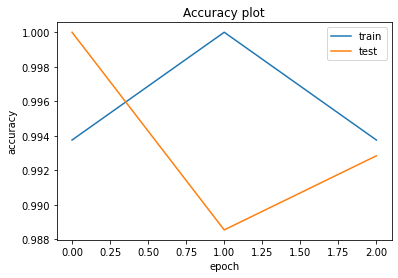

In [15]:
# Accuracy Plot
hist = hist.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

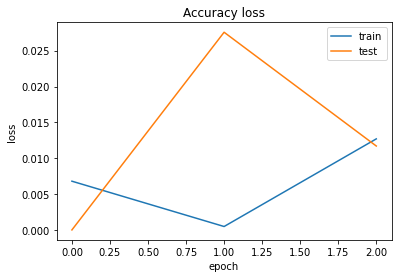

In [13]:
# Loss Plot
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")